In [1]:
# The Great Attractor

from scipy.integrate import quad
import numpy as np
import pandas as pd
import astropy.constants as cc
import astropy.units as uu

# Constants and parameters
G_now = 6.67430e-11  # Current gravitational constant (m^3 kg^-1 s^-2)
c = 3e8  # Speed of light in m/s
ly_to_m = 9.461e15  # Light year to meters
m_h = (cc.m_p+cc.m_e).si.value

# Current separation of neighboring volumes (1 billion light-years)
current_separation_ly = 100e6  # Light-years
current_separation_m = current_separation_ly * ly_to_m  # Convert to meters

# Radius of each neighboring volume (500 million light-years)
volume_radius_ly = current_separation_ly  # Light-years
volume_radius_m = 14.04e9*ly_to_m #volume_radius_ly * ly_to_m  # Convert to meters

# Universe properties at 100 million years old
early_age_years = 11.1e6  # Universe age in years at early epoch
current_age_years = 14.04e9  # Current age of the universe in years
G_early = G_now * (current_age_years / early_age_years)  # Epoch-dependency of G


# Define constants and initial parameters
mean_density_now = 7.25*m_h  # Average current density (kg/m^3)
fluctuation_fraction = 1 / 100000  # Density fluctuation
fluctuation_density = mean_density_now * fluctuation_fraction  # Fluctuation density (kg/m^3)

volume = (4 / 3) * np.pi * volume_radius_m**3  # Volume of each sphere (m^3)
mass = fluctuation_density * volume  # Mass of each volume (kg)

# Define the gravitational force equation with varying G and distance
def acceleration_due_to_gravity(t, G_now, current_age_years, early_age_years, mass, current_separation_m):
    # Gravitational constant at time t
    G_t = G_now * (current_age_years / t)  # Epoch-dependent G
    # Separation distance at time t (assuming proportional to age ratio)
    separation_t = current_separation_m * (t / current_age_years)

    # Gravitational acceleration
    acceleration_t = G_t * mass / separation_t**2  # Acceleration due to gravity
    return acceleration_t

# Integrate over time from the early epoch to now
t_start = early_age_years  # 100 million years
t_end = current_age_years  # Current age of the universe
time_seconds_conversion = 365 * 24 * 3600  # Years to seconds

# Convert times to seconds
t_start_seconds = t_start * time_seconds_conversion
t_end_seconds = t_end * time_seconds_conversion

# Integrate acceleration over time
velocity_gained, _ = quad(
    lambda t: acceleration_due_to_gravity(t, G_now, current_age_years, early_age_years, mass, current_separation_m),
    t_start, t_end
)

# Convert velocity to fraction of c
velocity_fraction_c = velocity_gained / c

# Results
integrated_results = {
    "Mass of Each Volume (kg)": mass,
    "Velocity Gained (km/s)": velocity_gained/1000,
    "Velocity Gained (fraction of c)": velocity_fraction_c,
}

integrated_results_df = pd.DataFrame.from_dict(integrated_results, orient="index", columns=["Value"])
integrated_results_df


,Value
Mass of Each Volume (kg),1.191169e+48
Velocity Gained (km/s),9.975394e+02
Velocity Gained (fraction of c),3.325131e-03


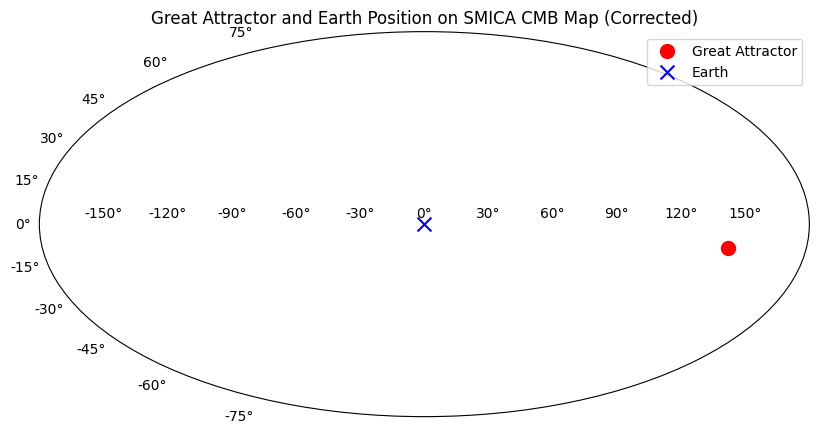

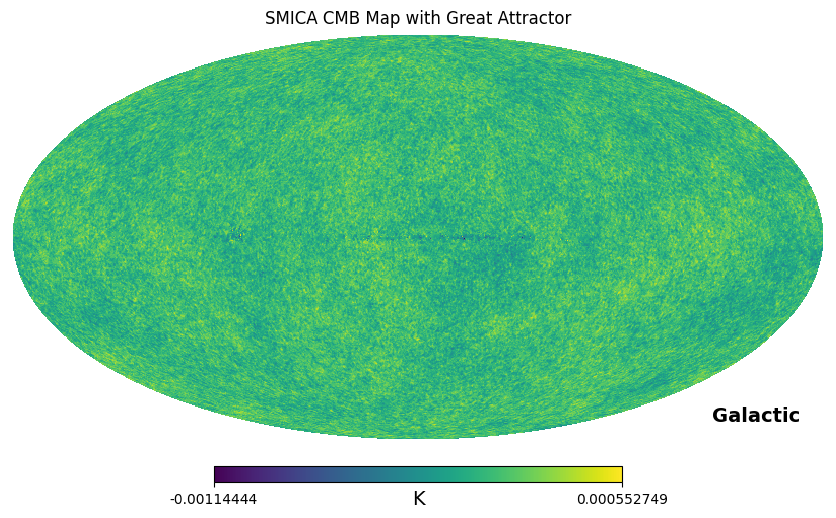

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from astropy.coordinates import SkyCoord
import astropy.units as u
from PIL import Image

smica_fits_path = "./DataSupernovaLBLgov/COM_CMB_IQU-smica_1024_R2.02_full.fits"
smica_fits_path = "./DataSupernovaLBLgov/COM_CMB_IQU-smica-field-Int_2048_R2.01_full.fits"
cmb_map = hp.read_map(smica_fits_path, field=0)

# Galactic coordinates of the Great Attractor (degrees)
l_ga = 307.0 - 270  # Galactic longitude
b_ga = -9.0    # Galactic latitude

# Galactic coordinates of Earth (reference point at l=0, b=0)
l_earth = 180.0
b_earth = 0.0

# Convert Galactic coordinates to Mollweide projection (radians)
coord_ga = SkyCoord(l=l_ga*u.degree, b=b_ga*u.degree, frame='galactic')
x_ga = np.radians(180 - coord_ga.l.deg)  # Ensure Earth is at (0,0)
y_ga = np.radians(coord_ga.b.deg)

coord_earth = SkyCoord(l=l_earth*u.degree, b=b_earth*u.degree, frame='galactic')
x_earth = np.radians(180 - coord_earth.l.deg)
y_earth = np.radians(coord_earth.b.deg)

# Plot the CMB map using Mollweide projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'mollweide'})
hp.mollview(cmb_map, coord='G', title="SMICA CMB Map with Great Attractor", unit='K')

# Plot Great Attractor's position
ax.scatter(x_ga, y_ga, color='red', s=100, label='Great Attractor')

# Plot Earth's position at the center
ax.scatter(x_earth, y_earth, color='blue', s=100, label='Earth', marker='x')

ax.legend()
ax.set_title("Great Attractor and Earth Position on SMICA CMB Map (Corrected)")

# Show plot
plt.grid(True)
plt.show()

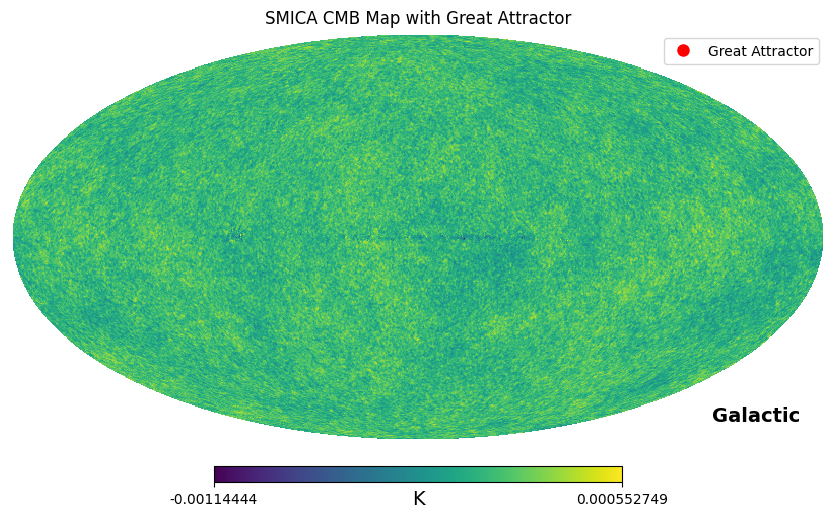

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from astropy.coordinates import SkyCoord
import astropy.units as u

# Load SMICA CMB data from FITS file
smica_fits_path = "./DataSupernovaLBLgov/COM_CMB_IQU-smica_1024_R2.02_full.fits"
smica_fits_path = "./DataSupernovaLBLgov/COM_CMB_IQU-smica-field-Int_2048_R2.01_full.fits"
cmb_map = hp.read_map(smica_fits_path, field=0)

# Galactic coordinates of the Great Attractor (degrees)
l_ga = 307.0  # Galactic longitude
b_ga = 9.0    # Galactic latitude

# Convert Galactic coordinates to radians
l_ga_rad = np.radians(l_ga)
b_ga_rad = np.radians(b_ga)

# Plot the CMB map using Mollweide projection
hp.mollview(cmb_map, coord='G', title="SMICA CMB Map with Great Attractor", unit='K')

# Convert Galactic coordinates to pixel indices
nside = hp.get_nside(cmb_map)
vec_ga = hp.ang2vec(np.pi/2 - b_ga_rad, l_ga_rad)
pix_ga = hp.vec2pix(nside, *vec_ga)

# Get theta and phi for the Great Attractor
theta_ga, phi_ga = hp.pix2ang(nside, pix_ga)
x_ga = -phi_ga + np.pi  # Mollweide projection adjustment
y_ga = np.pi/2 - theta_ga

# Plot Great Attractor's position
plt.plot(x_ga, y_ga, 'ro', markersize=8, label='Great Attractor')

plt.legend()
plt.show()


In [54]:
cmb_map

array([-1.38182120e-04, -1.07610285e-04, -8.14197265e-05, ...,
        9.57445518e-05,  8.11368227e-05,  7.45054058e-05], dtype='>f4')